___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import scipy.stats as stats
pd.options.display.float_format = '{:.3f}'.format

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [29]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [30]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [31]:
df.shape

(15915, 23)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [33]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000
mean,18024.381,32089.996,5.937,1.390,1.043,88.499,0.247,1428.662,1337.701,4.832
std,7381.679,36977.215,0.705,1.121,0.339,26.674,0.431,275.804,199.682,0.868
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000
25%,12850.000,1920.500,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.100
50%,16900.000,20413.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100


In [34]:
df2 = df.copy()

## Get dummies 

In [35]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [37]:
df = pd.get_dummies(df) #drop_first=True

In [38]:
df.shape

(15915, 143)

<AxesSubplot:xlabel='price'>

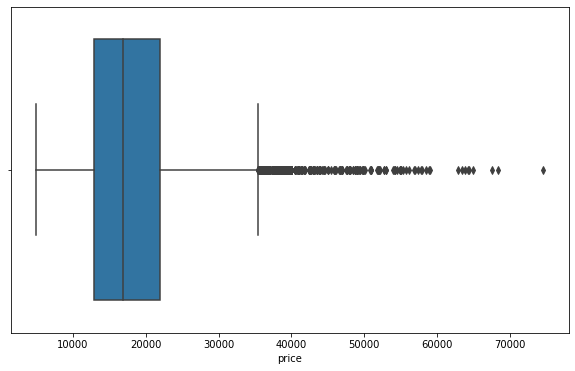

In [40]:
sns.boxplot(df.price)

In [41]:
df.isnull().any().any()

False

In [42]:
df = df[~(df.price>35000)]

<AxesSubplot:xlabel='price', ylabel='Count'>

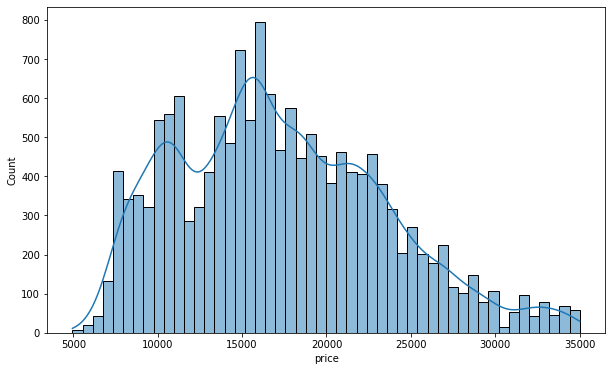

In [43]:
sns.histplot(df.price, bins=50, kde=True)

In [44]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,

<AxesSubplot:>

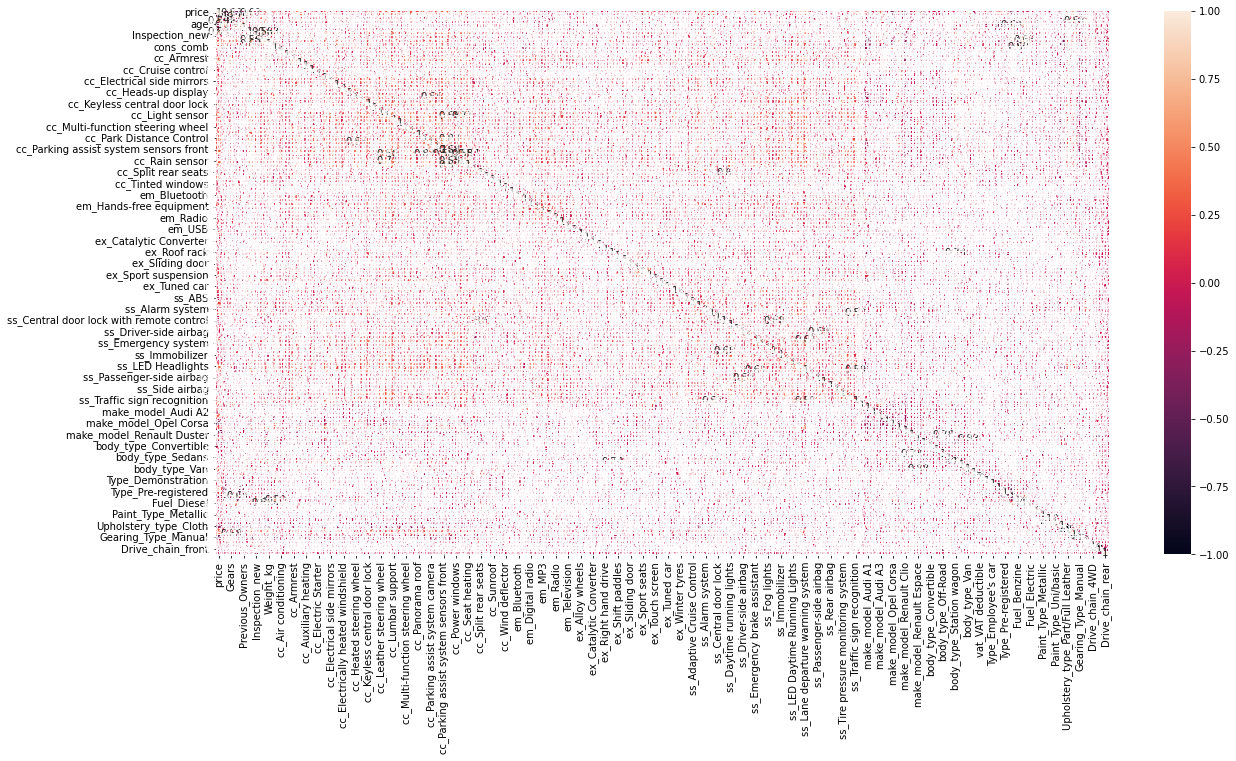

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(df_numeric.corr(), annot =True)

In [46]:
for i in df.drop(columns ="price"):
    print(f"corr between price and {i:<40}:  {df.price.corr(df[i])}") # 40 tab mesafesi

corr between price and km                                      :  -0.40082276649030385
corr between price and Gears                                   :  0.5689484407117769
corr between price and age                                     :  -0.45895450948727096
corr between price and Previous_Owners                         :  -0.1413437958633139
corr between price and hp_kW                                   :  0.6301125340450868
corr between price and Inspection_new                          :  0.02338272494253059
corr between price and Displacement_cc                         :  0.17957959235069273
corr between price and Weight_kg                               :  0.4175463281948262
corr between price and cons_comb                               :  0.1491775151374796
corr between price and cc_Air conditioning                     :  0.09065467038885971
corr between price and cc_Air suspension                       :  0.05245055747208386
corr between price and cc_Armrest                       

### Train | Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop("price", axis=1)
y= df["price"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12336, 142)
Train target shape   :  (12336,)
Test features shape  :  (3084, 142)
Test target shape    :  (3084,)


In [51]:
X_train

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
1945,9000.000,7.000,0.000,1.000,85.000,1,999.000,1200.000,4.800,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
10517,20710.000,6.000,2.000,1.000,100.000,1,1598.000,1487.000,5.100,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4269,105000.000,6.000,2.000,1.000,110.000,1,1968.000,1360.000,4.200,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
6589,25107.000,6.000,1.000,1.000,110.000,1,1399.000,1350.000,5.400,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [52]:
from sklearn.linear_model import LinearRegression

## Scaling the Data

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 
# genelde standartScaler ile z score alıyoruz  ama katogorik verilerde ve dumylerde minmaxscaler, outlier olduğunda robustscaler kullanılıyor.
#StandartScaler z score mean=0, SS=1 a dönüştürüyor +3 ile -3 arasında 

In [54]:
scaler.fit(X_train) 
#X ait ortalama ve standart sapma bilgilerini alıyor.
#fit işlemi sadece traine uygulanıyor.

MinMaxScaler()

In [55]:
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[2.83911672e-02, 6.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.53312303e-02, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.31230284e-01, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.57728707e-04, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.01261830e-02, 6.66666667e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.15457413e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [56]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[7.88643533e-02, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.19672747e-03, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.92429022e-01, 3.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.54889590e-01, 3.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.48264984e-04, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.02523659e-01, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [58]:
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = lm.predict(X_test) #test setinin prediction , eğitim ve test karşılaştırıp overfit, underfit vb kontrol edebilebilir.
y_train_pred = lm.predict(X_train) #eğitim setinin prediction 

In [60]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
4329,17400,18447.162,-1047.162
7917,16990,15994.030,995.970
3327,27500,21090.757,6409.243
4086,19444,18617.838,826.162
15471,32900,31885.856,1014.144
8056,17880,18696.200,-816.200
11320,20990,20111.155,878.845
11527,16890,18500.696,-1610.696
6361,15990,16263.215,-273.215
13922,9290,6959.572,2330.428


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [63]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [64]:
ls=train_val(lm, X_train, y_train, X_test, y_test)
ls

,train,test
R2,0.900,0.896
mae,1409.021,1422.473
mse,3755453.147,3837000.790
rmse,1937.899,1958.826


In [65]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9004535366349167
MAE 		: 1409.021295936686
MSE 		: 3755453.146994095
RMSE 		: 1937.899158107587


In [66]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [67]:
adj_r2(y_test, y_pred, df)

0.895498444646193

In [68]:
residuals = y_test-y_pred

## Cross Validate

In [69]:
from sklearn.model_selection import cross_validate, cross_val_score

In [70]:
lcm = LinearRegression()
scores = cross_validate(lcm, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [71]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.132,0.015,0.898,-1410.440,-3864256.258,-1965.771
2,0.104,0.007,0.897,-1457.432,-3989740.265,-1997.433
3,0.104,0.012,0.893,-1428.075,-3854690.303,-1963.337
4,0.115,0.009,0.897,-1432.984,-4019440.560,-2004.854
5,0.168,0.013,0.898,-1431.303,-3761589.110,-1939.482


In [72]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                                   0.897
test_neg_mean_absolute_error          -1432.047
test_neg_mean_squared_error        -3897943.299
test_neg_root_mean_squared_error      -1974.175
dtype: float64

In [73]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.900,0.896
mae,1409.021,1422.473
mse,3755453.147,3837000.790
rmse,1937.899,1958.826


In [74]:
lm.coef_

array([-3.39992320e-02,  6.59776700e+02, -1.47404931e+03,  1.65140939e+02,
        6.94374099e+01, -5.68654961e+01, -1.22407878e+00, -1.00277386e+00,
        8.98617240e+01,  3.53653488e+02,  5.21900867e+02, -4.18996944e+01,
        2.34321813e+02,  9.45744618e+01,  3.70684788e+02, -9.13359449e+02,
       -9.12207867e+01, -5.74669037e+01, -1.41827854e+02,  7.39483844e+01,
        7.50515396e+02,  1.12373937e+02,  2.57372503e+01,  1.78075339e+02,
       -3.65376148e+02,  2.22437565e+02,  1.05097105e+02, -2.44063309e+02,
        7.31351617e+02,  1.53577176e+02,  1.74816986e+02, -3.68367701e+02,
        4.08017805e+02,  1.47576039e+02,  3.16516101e+02,  2.66839170e+02,
       -3.64039124e+02, -7.40599340e+01, -1.28664216e+02,  3.63754237e+01,
        1.01813538e+02, -6.26003590e+01,  1.29419471e+02,  4.36639373e+02,
        2.21648221e+02, -1.04038586e+03, -1.83289717e+02, -2.26278636e+02,
       -1.19628653e+02,  5.50152918e+02, -4.30962733e+01,  8.09486777e+01,
       -8.25857678e+01,  

In [75]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.head(5)

,lm_coef
0,-0.034
1,659.777
2,-1474.049
3,165.141
4,69.437


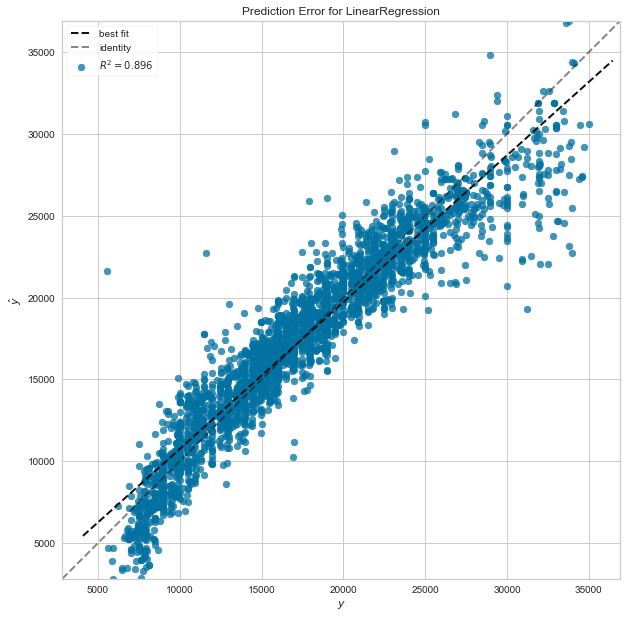

In [76]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

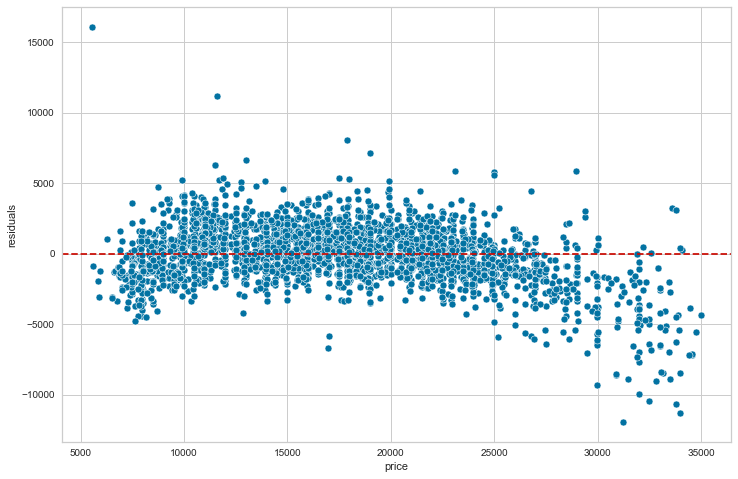

In [77]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

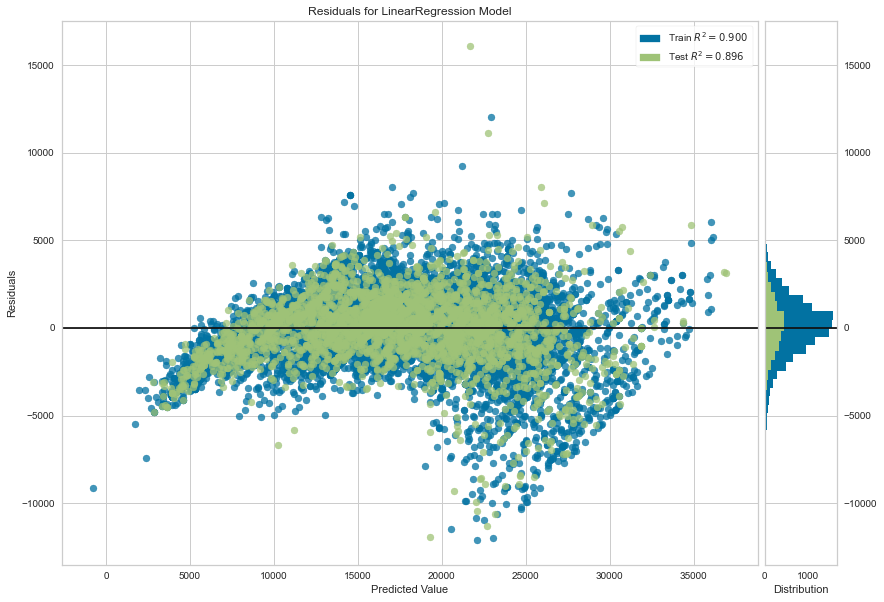

In [78]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.features import RadViz

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();      

In [79]:
y_pred = lm.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [80]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [81]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
2444,22290,22152.927,137.073
8836,13890,13617.632,272.368
14778,10990,12982.213,-1992.213
2929,15980,17645.214,-1665.214
10481,18250,19123.514,-873.514
1045,19900,21449.108,-1549.108
2524,22490,21357.595,1132.405
511,13690,13528.186,161.814
5207,25900,24879.273,1020.727
10583,15780,17296.736,-1516.736


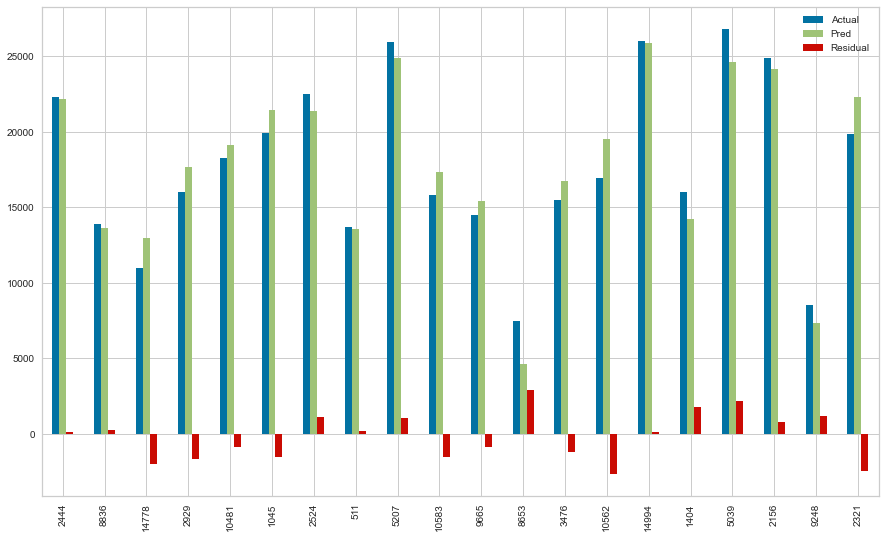

In [82]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

In [83]:
pd.DataFrame(lm.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-7891.534
make_model_Renault Clio,-4018.604
make_model_Opel Corsa,-3924.128
body_type_Convertible,-2217.235
Drive_chain_rear,-2134.949
make_model_Opel Astra,-1957.353
Gearing_Type_Manual,-1662.866
ex_Sliding door,-1480.487
age,-1474.049
ex_Right hand drive,-1048.974


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [84]:
from sklearn.linear_model import Ridge, RidgeCV

In [85]:
ridge_model = Ridge(alpha=1, random_state=42)

In [86]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [87]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [88]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.897
mae,1409.382,1421.337
mse,3758395.688,3828072.852
rmse,1938.658,1956.546


## Finding best alpha for Ridge

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [91]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [93]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [94]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [95]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131,0.030,0.002,0.001,0.010,{'alpha': 0.01},-1990.148,-1942.210,-1983.854,-2007.340,-2018.381,-1896.551,-2022.048,-1983.417,-2025.095,-1851.755,-1972.080,55.103,3
1,0.114,0.014,0.002,0.001,1.020,{'alpha': 1.02},-1990.334,-1941.549,-1983.641,-2007.600,-2010.199,-1897.454,-2025.969,-1982.279,-2024.605,-1848.554,-1971.218,55.408,1
2,0.122,0.020,0.002,0.001,2.030,{'alpha': 2.03},-1991.627,-1941.334,-1984.138,-2008.223,-2004.541,-1899.877,-2029.741,-1981.603,-2025.582,-1847.557,-1971.422,55.521,2
3,0.107,0.016,0.002,0.002,3.040,{'alpha': 3.04},-1993.397,-1941.670,-1985.070,-2009.131,-2000.668,-1902.568,-2033.570,-1981.440,-2027.064,-1847.518,-1972.210,55.657,4
4,0.111,0.012,0.003,0.004,4.050,{'alpha': 4.05},-1995.446,-1942.432,-1986.302,-2010.253,-1998.000,-1905.291,-2037.427,-1981.698,-2028.831,-1848.018,-1973.370,55.835,5
5,0.103,0.012,0.002,0.003,5.060,{'alpha': 5.06},-1997.672,-1943.510,-1987.751,-2011.535,-1996.172,-1907.973,-2041.270,-1982.291,-2030.777,-1848.858,-1974.781,56.046,6
6,0.101,0.016,0.003,0.005,6.070,{'alpha': 6.07},-2000.015,-1944.820,-1989.357,-2012.937,-1994.947,-1910.592,-2045.072,-1983.148,-2032.839,-1849.927,-1976.365,56.280,7
7,0.102,0.009,0.002,0.001,7.080,{'alpha': 7.08},-2002.433,-1946.302,-1991.080,-2014.431,-1994.169,-1913.138,-2048.813,-1984.213,-2034.976,-1851.156,-1978.071,56.531,8
8,0.105,0.015,0.002,0.002,8.090,{'alpha': 8.09},-2004.898,-1947.910,-1992.886,-2015.993,-1993.731,-1915.610,-2052.482,-1985.445,-2037.161,-1852.501,-1979.862,56.791,9
9,0.114,0.013,0.003,0.005,9.100,{'alpha': 9.1},-2007.388,-1949.612,-1994.753,-2017.606,-1993.554,-1918.011,-2056.074,-1986.809,-2039.373,-1853.928,-1981.711,57.057,10


In [96]:
ridge_grid_model.best_index_

1

In [97]:
ridge_grid_model.best_score_

-1971.2183646538538

In [98]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.897
mae,1409.389,1421.329
mse,3758477.726,3828001.258
rmse,1938.679,1956.528


In [99]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [100]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10583.914
make_model_Renault Duster,-6966.116
age,-4458.420
make_model_Renault Clio,-3576.376
make_model_Opel Corsa,-3537.810
Displacement_cc,-2248.473
body_type_Convertible,-1863.125
Gearing_Type_Manual,-1673.729
Weight_kg,-1511.606
make_model_Opel Astra,-1502.251


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [101]:
from sklearn.linear_model import Lasso, LassoCV

In [102]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [103]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.897
mae,1411.515,1419.518
mse,3774296.042,3803394.222
rmse,1942.755,1950.229


## For Lasso CV with Default Alpha : 1

In [104]:
lasso_cv_model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [105]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.202,0.005,0.898,-1410.436,-3864253.757,-1965.771
2,0.153,0.005,-6407601366954873.000,-10033314434.267,-248346400059930156466176.000,-498343656586.426
3,0.111,0.003,-240941912559246.625,-1879169691.508,-8711651390836446330880.000,-93336227644.128
4,0.290,0.003,0.897,-1433.660,-4021023.623,-2005.249
5,0.100,0.004,-79356258337655072.000,-48519939726.455,-2921219484088838018564096.000,-1709157536357.851


In [106]:
scores.iloc[:,2:].mean()
#pd.DataFrame(scores, index = range(1, 6)).mean()

test_r2                                   -17200960323433836.000
test_neg_mean_absolute_error                    -12086485339.265
test_neg_mean_squared_error        -635655507107920903929856.000
test_neg_root_mean_squared_error               -460167484911.885
dtype: float64

## Finding best alpha for Lasso

In [107]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [108]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [109]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [110]:
lasso_grid_model.best_score_

-1969.9801196389824

In [111]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.897
mae,1411.577,1419.556
mse,3774699.126,3803590.354
rmse,1942.858,1950.280


In [112]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [113]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10579.779
make_model_Renault Duster,-6830.608
age,-4468.397
make_model_Renault Clio,-4314.259
make_model_Opel Corsa,-4305.144
make_model_Opel Astra,-2313.634
Displacement_cc,-1907.847
Gearing_Type_Manual,-1618.296
Weight_kg,-1141.604
ss_Rear airbag,-644.347


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [114]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [115]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [116]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.613,0.605
mae,3004.789,3047.982
mse,14597013.455,14652469.770
rmse,3820.604,3827.854


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [117]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [118]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.607,-3025.594,-14892842.811,-3859.125
2,0.613,-3048.789,-14986029.960,-3871.179
3,0.612,-2966.353,-14015868.122,-3743.777
4,0.613,-3039.889,-15092461.688,-3884.902
5,0.612,-2971.208,-14278526.530,-3778.694


In [119]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.612
test_neg_mean_absolute_error           -3010.367
test_neg_mean_squared_error        -14653145.822
test_neg_root_mean_squared_error       -3827.535
dtype: float64

 Choosing best alpha and l1_ratio values with Grid Search

In [120]:
elastic_model = ElasticNet(random_state=42)

In [121]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [122]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [123]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [124]:
elastic_grid_model.best_score_

-1969.9801196389824

In [125]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.900,0.897
mae,1411.577,1419.556
mse,3774699.126,3803590.354
rmse,1942.858,1950.280


In [126]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature İmportance

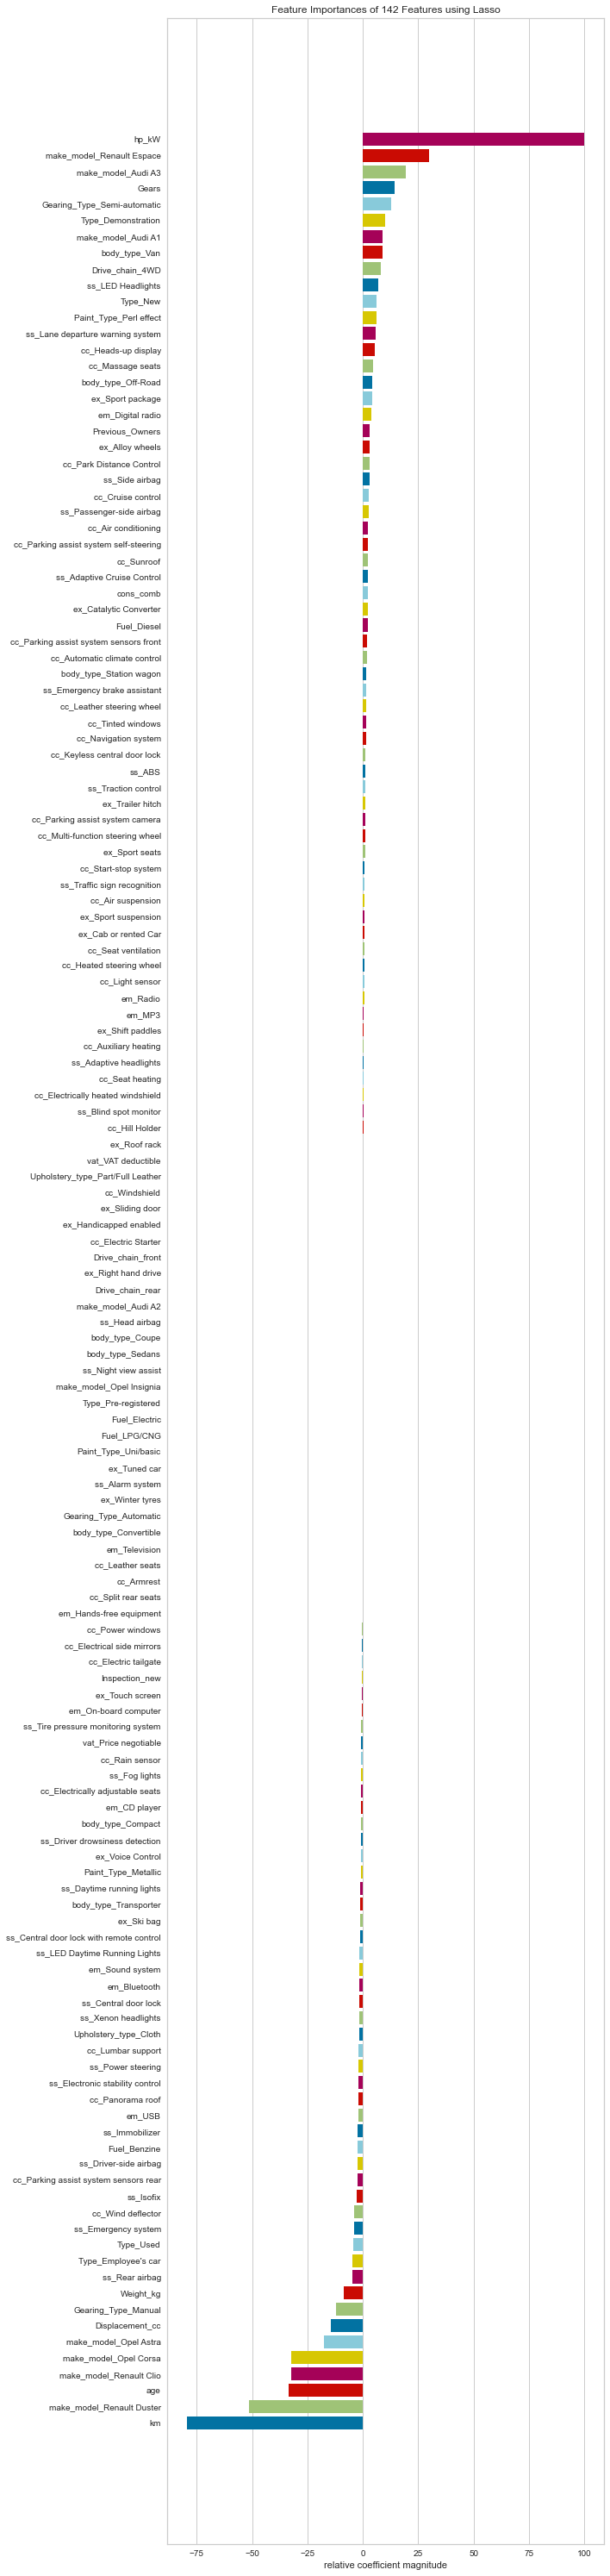

In [127]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [128]:
df_new = df2[["make_model", "hp_kW", "km","age", "price", "Gearing_Type"]]

In [129]:
df_new.head()

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.000,56013.000,3.000,15770,Automatic
1,Audi A1,141.000,80000.000,2.000,14500,Automatic
2,Audi A1,85.000,83450.000,3.000,14640,Automatic
3,Audi A1,66.000,73000.000,3.000,14500,Automatic
4,Audi A1,66.000,16200.000,3.000,16790,Automatic


In [137]:
df_new = df_new[~(df_new.price>35000)]

In [138]:
df_new = pd.get_dummies(df_new)

Final Model

In [139]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [145]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [146]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [147]:
lasso_final_model.best_score_

-2221.6132907788656

In [148]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.870,0.868
mae,1600.771,1591.606
mse,4917369.194,4900727.484
rmse,2217.514,2213.759


In [149]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## 7. Visually Compare Models Performance In a Graph

In [150]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.896,1422.473,1958.826
ridge_m,0.897,1421.329,1956.528
lasso_m,0.897,1419.556,1950.280
elastic_m,0.897,1419.556,1950.280
final_m,0.868,1591.606,2213.759


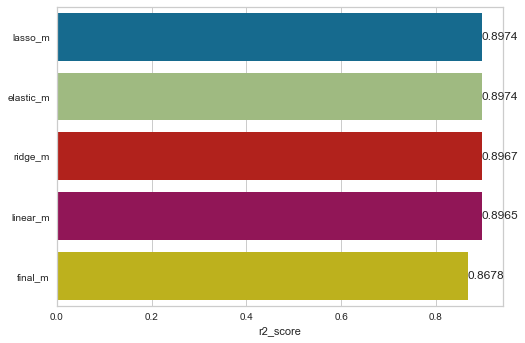

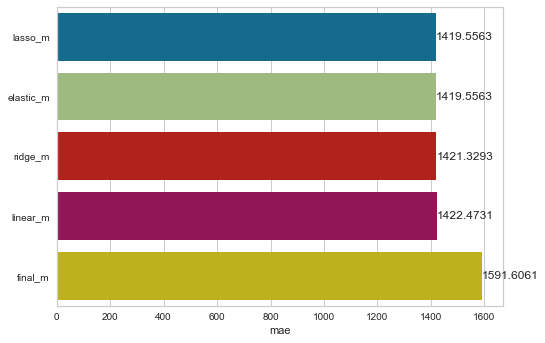

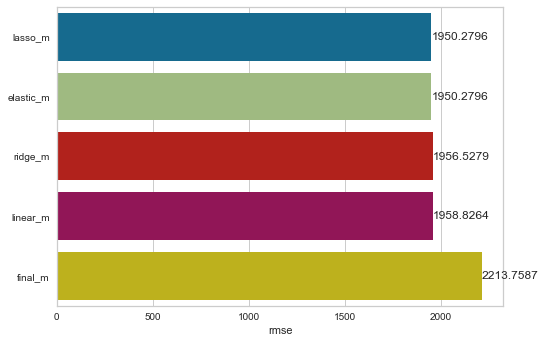

In [169]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

In [172]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(X)

In [175]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [176]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [177]:
final_model.best_estimator_

Lasso(alpha=1.02, random_state=42)

In [178]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [179]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [180]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,0,1,0,0


In [181]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,1,1


In [182]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,0,1,0,0,0,0,0,0,1,0,0


In [183]:
X.head(1)

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,1,0,0,0,0,0,0,0,0,1,0,0


In [184]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [185]:
final_model.predict(my_dict)

array([19559.18354579])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___